In [1]:
import torch
from torch import nn


In [2]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
device = 'mps'

In [4]:
import requests
import zipfile
from pathlib import Path
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

#If image folde doesn't  exist download it and prepare it

if image_path.is_dir():
    print (f"{image_path} directory already exist, skipping download")
else:
    print(f'{image_path} doesnt exist, creating one' )
    image_path.mkdir(parents=True, exist_ok=True)

#Making file and filling it with download content
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:  #Creating file pizza_steak_sushi || wb - write permission
    requests = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print ("Downloading")
    f.write(requests.content) #Writes dowloaded ti a file in with open string

 
#Unzip pizza steak sushi dataset
with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip', "r") as zip_ref:
    print("Unzipping")
    zip_ref.extractall(image_path)





data\pizza_steak_sushi directory already exist, skipping download
Downloading
Unzipping


In [5]:
image_path

WindowsPath('data/pizza_steak_sushi')

In [6]:
#Becoming one with data

import os 

def walk_through_dir(path):
    for dirpath, dirnames, filenames in os.walk(path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}")
        
        

In [7]:
walk_through_dir(image_path)

There are 2 directories and 0 files in data\pizza_steak_sushi
There are 3 directories and 0 files in data\pizza_steak_sushi\test
There are 0 directories and 25 files in data\pizza_steak_sushi\test\pizza
There are 0 directories and 19 files in data\pizza_steak_sushi\test\steak
There are 0 directories and 31 files in data\pizza_steak_sushi\test\sushi
There are 3 directories and 0 files in data\pizza_steak_sushi\train
There are 0 directories and 78 files in data\pizza_steak_sushi\train\pizza
There are 0 directories and 75 files in data\pizza_steak_sushi\train\steak
There are 0 directories and 72 files in data\pizza_steak_sushi\train\sushi


In [8]:
train_dir = image_path/"train"
test_dir = image_path/"test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [9]:
#Visualize the images
import random
from PIL import Image



# Get all images paths
# Pick a random image using random.choice()
# Get image class name using pathlib.Path.parent.stem
# Open image using PIL
# Show image metadata
image_path_list = list(image_path.glob('*/*/*.jpg'))
image_path_list


[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2124579.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2236338.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2508636.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2871261.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/3092704.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/309892.jp

In [10]:
random_image_path = random.choice(image_path_list)
random_image_path
    

WindowsPath('data/pizza_steak_sushi/train/steak/2614189.jpg')

In [11]:
image_class = random_image_path.parent.stem
image_class

'steak'

In [12]:
img = Image.open(random_image_path)

random image path: data\pizza_steak_sushi\train\steak\2614189.jpg
random_image class: steak
image height: 512
image width: 512


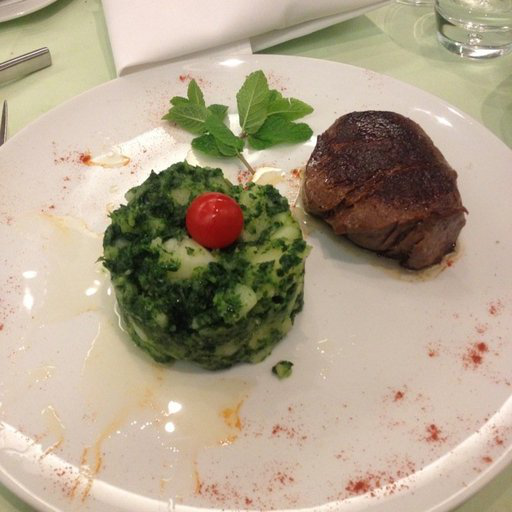

In [13]:
print(f'random image path: {random_image_path}')
print(f'random_image class: {image_class}')
print(f'image height: {img.height}')
print(f'image width: {img.width}')
img

(-0.5, 511.5, 511.5, -0.5)

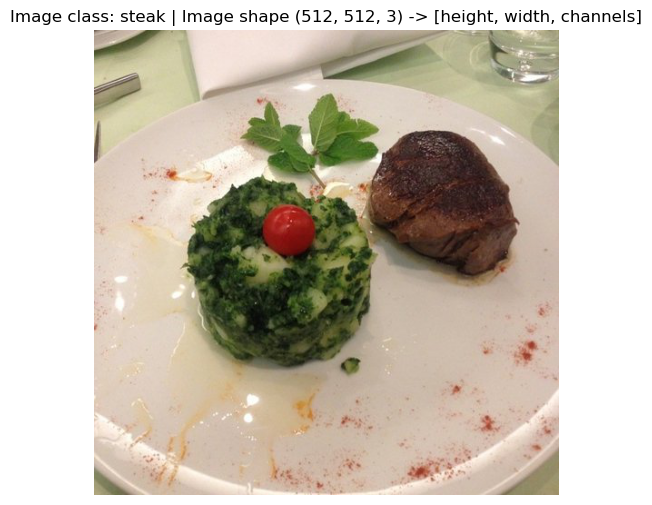

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# Show image with matplotlib
image_as_array = np.asarray(img)

plt.figure(figsize=(6,8))
plt.imshow(image_as_array)
plt.title(f'Image class: {image_class} | Image shape {image_as_array.shape} -> [height, width, channels]')
plt.axis(False)

Turning images into Torch tensors format


turn images into torch.utils.data.Dataset and subsequently to torch.utils.data.DataLoader we'll call it Dataset and DataLoader



In [16]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


Transforming data with torchvision.transforms

In [17]:
data_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                     transforms.RandomHorizontalFlip(p=0.5),
                                     transforms.ToTensor()])

In [18]:
data_transform(img=img).shape

torch.Size([3, 64, 64])

In [19]:
data_transform(img)

tensor([[[0.6510, 0.6706, 0.7412,  ..., 0.7333, 0.7216, 0.6902],
         [0.6510, 0.6824, 0.7176,  ..., 0.7373, 0.7412, 0.7255],
         [0.6745, 0.6824, 0.6824,  ..., 0.4196, 0.4980, 0.5882],
         ...,
         [0.6000, 0.5843, 0.5804,  ..., 0.7765, 0.6196, 0.5333],
         [0.6196, 0.6118, 0.5843,  ..., 0.5569, 0.5176, 0.5843],
         [0.6235, 0.6275, 0.6078,  ..., 0.4824, 0.5765, 0.6549]],

        [[0.6353, 0.6549, 0.7176,  ..., 0.6667, 0.6588, 0.6275],
         [0.6471, 0.6784, 0.7059,  ..., 0.6863, 0.6784, 0.6588],
         [0.6745, 0.6902, 0.6941,  ..., 0.4431, 0.4980, 0.5608],
         ...,
         [0.5725, 0.5529, 0.5451,  ..., 0.7137, 0.5882, 0.5333],
         [0.5843, 0.5725, 0.5529,  ..., 0.5294, 0.5137, 0.5725],
         [0.5765, 0.5804, 0.5647,  ..., 0.4863, 0.5608, 0.6235]],

        [[0.5059, 0.5255, 0.5843,  ..., 0.6078, 0.6039, 0.5725],
         [0.5176, 0.5490, 0.5804,  ..., 0.6078, 0.6118, 0.6000],
         [0.5333, 0.5529, 0.5569,  ..., 0.2863, 0.3725, 0.

In [ ]:
20:49:45